In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Load features 
features_path = "../data/preprocessed_features.csv"
features_df = pd.read_csv(features_path)

# drop participants id
features_df = features_df.drop(columns=["participants"])

In [3]:
features_df = features_df.fillna(0)

In [4]:
scaler = StandardScaler()
scaled_df=features_df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [5]:
#define PCA model to use
pca = PCA(n_components=15)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

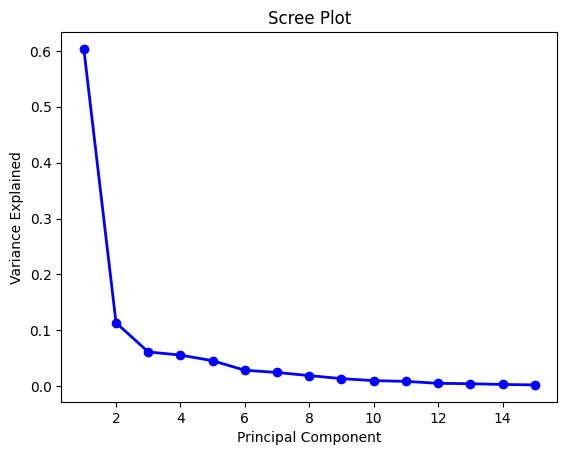

In [6]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

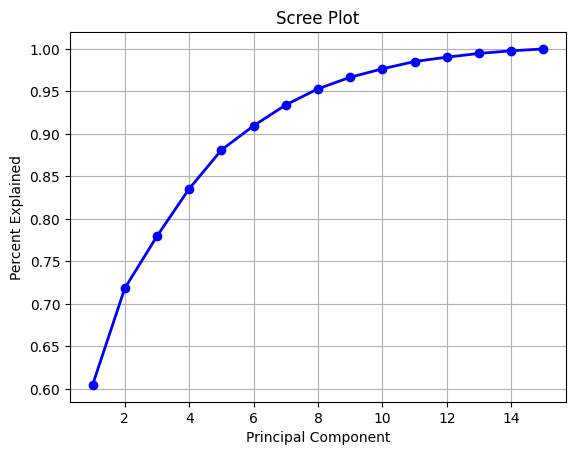

In [7]:
percent_explained = np.cumsum(pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_)
plt.plot(PC_values, percent_explained, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percent Explained')
plt.grid()
plt.show()